In [1275]:
%pylab inline
from __future__ import division
import cmath
import matplotlib.animation as animation

Populating the interactive namespace from numpy and matplotlib


In [1515]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)


from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

r_min=0.3
r_start=r_min
r_end=200
r_steps=1000
r_grid= (r_end-r_start)/r_steps
r=linspace(r_start,r_end,r_steps)
r_0= 2.0
sig= 0.25
c= 0
m= 1

In [1540]:
r_min=1
r_start=r_min
r_end=10
r_steps=270 #5000
r_grid= (r_end-r_start)/r_steps
r=linspace(r_start,r_end,r_steps)
r_0= 2.0
sig= 0.25
c= 0
m= 1

In [1517]:
t_start=0
t_end=10  #100
t_steps=10000 #6000
t_grid= (t_end-t_start)/t_steps
t=linspace(t_start, t_end, t_steps )

In [1518]:
Y=np.empty((r_steps,t_steps),dtype=np.complex_)
K=np.empty((r_steps,t_steps),dtype=np.complex_)

In [1519]:
Y_0=lambda r: (r-r_min)**2 * exp( -(r-r_0)**2/(2*sig**2) )

In [1520]:
S= lambda i,j: (  (c*m)**2/r[i]**4 - (m**2-0.25)/r[i] )*Y[i,j] + (r_grid)**(-2)*(Y[i+1,j] -2*Y[i,j] + Y[i-1,j]) 

In [1521]:
#set initial condition
Y[:,0]= Y_0(r)

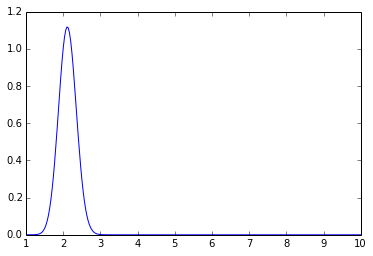

In [1522]:
plt.plot (r,Y[:,0])

In [1499]:
for j in range(0,t_steps-1): 
    for i in range (1,r_steps-1):
        K[i,j+1]= K[i,j] + t_grid*(r_grid)**(-2)*(Y[i+1,j] -2*Y[i,j] + Y[i-1,j])
        Y[i,j+1]= Y[i,j] + t_grid*K[i,j]

In [1523]:
for j in range(0,t_steps-1): 
    for i in range (1,r_steps-1):
        K[i,j+1]= K[i,j] + t_grid*( (-2j*c*m*K[i,j])/r[i]**2 +  S(i,j) )
        Y[i,j+1]= Y[i,j] + t_grid*K[i,j]

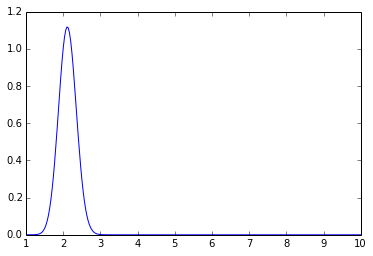

In [1538]:
plt.plot (r,Y[:,0])

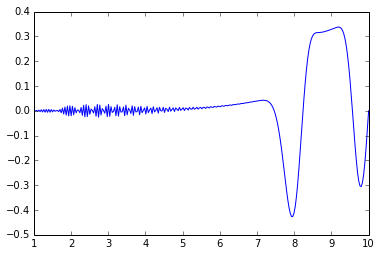

In [1539]:
plt.plot (r,Y[:,9900].real)

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(r_start-1, r_end), ylim=(-1.1,1.1))
line, = ax.plot([], [], lw=1)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    j=int(i)
    x = r
    y = Y[:,i].real
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=range(0,t_steps), interval=100, blit=True) #init_func=init
#t_steps
anim.save('c_0_eqn_500.mp4', fps=500, dpi=90) #Frame per second controls speed, dpi controls the quality 


# call our new function to display the animation
#display_animation(anim)

0